## Matching and plotting the mooring EKE profiles to the nearest time-mean Argo EKE profile

In [1]:
import json
import gcsfs
# dir = C:\Users\annab\Desktop\ArgoEKE\github-argo-eke\data\
fp = r"C:\Users\annab\Desktop\ArgoEKE\pangeo-181919-e7bc5bdaf4d5.json" # dir+r'pangeo-181919-e7bc5bdaf4d5.json' #
with open(fp) as f:
    token = json.load(f)
gcs = gcsfs.GCSFileSystem(token=token) # file system instance

In [2]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
plt.rcParams['figure.dpi'] = 350
import xarray as xr
import numpy as np
import os
import datetime
import pandas as pd

In [3]:
# gcs.ls('pangeo-argo-eke/mooringlocation_mapped_EKE/')

# # open zarr file at 'pangeo-argo-eke/mooringlocation_mapped_EKE/AllMoorings_interpolatedCovParams.zarr'"Alison mtg.txt"
ds = xr.open_zarr(gcs.get_mapper('pangeo-argo-eke/mooringlocation_mapped_EKE/AllMoorings_interpolatedCovParams.zarr'))
ds


<xarray.Dataset> Size: 1GB
Dimensions:                (mooringlocation_index: 1620, time: 657,
                            pressure: 30, latitude: 1620, longitude: 1620,
                            parameter: 6)
Coordinates:
  * latitude               (latitude) float64 13kB 32.7 32.16 ... 39.58 38.11
  * longitude              (longitude) float64 13kB -128.1 -128.0 ... -9.968
  * mooringlocation_index  (mooringlocation_index) int64 13kB 0 1 ... 1618 1619
  * parameter              (parameter) int64 48B 0 1 2 3 4 5
  * pressure               (pressure) float64 240B 0.0 5.0 ... 1.9e+03 2e+03
  * time                   (time) datetime64[ns] 5kB 2004-01-06 ... 2021-12-22
Data variables:
    EKE                    (mooringlocation_index, time, pressure) float64 255MB dask.array<chunksize=(1, 657, 30), meta=np.ndarray>
    opt_covparams          (mooringlocation_index, pressure, parameter) float64 2MB dask.array<chunksize=(1, 30, 6), meta=np.ndarray>
    u                      (mooringlocation_index, time, pressure) float64 255MB dask.array<chunksize=(1, 657, 30), meta=np.ndarray>
    uMSE                   (mooringlocation_index, time, pressure) float64 255MB dask.array<chunksize=(1, 657, 30), meta=np.ndarray>
    v                      (mooringlocation_index, time, pressure) float64 255MB dask.array<chunksize=(1, 657, 30), meta=np.ndarray>
    vMSE                   (mooringlocation_index, time, pressure) float64 255MB dask.array<chunksize=(1, 657, 30), meta=np.ndarray>
Attributes:
    betaparamfile:               pangeo-argo-eke/testfolder_112/vel_betaparams/
    description:                 Estimated velocities & uncertainties, mapped...
    filename:                    pangeo-argo-eke/mooringlocation_mapped_EKE/A...
    initialized_date:            2025-04-21 17:54:24.642084
    number_of_harmonics:         2
    residualfile:                pangeo-argo-eke/testfolder_112/vel_argolocat...
    uvfitfile:                   pangeo-argo-eke/testfolder_112/global_uvfit_...
    window_size_betaparameters:  500000.0

In [4]:
# make a map of all locations in ds using the latitude and longitude coordinates
import matplotlib.pyplot as plt
from mpl_params import mpl_params, map_params

# remove data points where variables u and v are NaN
mask = ~np.isnan(ds.u.values) & ~np.isnan(ds.v.values)
# flatten mask to be 1D instead of 3D based on if there are any nans in the second and third dimensions --then make the first dimension False
mask = mask.any(axis=(1, 2))


c:\Users\annab\miniconda3\envs\cnj\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\annab\miniconda3\envs\cnj\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


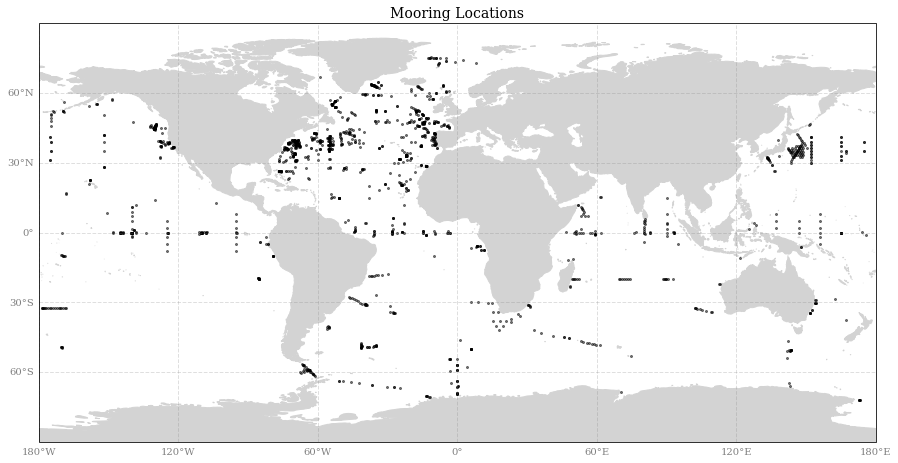

In [8]:
plt.rcParams.update(mpl_params(size=16, font_family='DejaVu Serif', mathtext='cm', ))
ax = map_params(figsize=(15,10), gl_and_labels=True)
ax.plot(ds.longitude.values[mask], ds.latitude.values[mask],'o', transform=ccrs.PlateCarree(), markersize=2, color='black', alpha=0.5)
# plt.colorbar(label='Pressure (dbar)')
ax.set_title(r'Mooring Locations')

plt.show()

# Below: code from 2024 computation (may be outdated)

In [ ]:
EKEdatafile = 'pangeo-argo-eke/data/DynamicHeightData/global_DH_20231005_chunked.zarr' #'pangeo-argo-eke/testfolder_102/EKE/global_timemean.zarr' #'pangeo-argo-eke/testfolder_100/EKE/SH_timemean.zarr'
GCSmapper = gcs.get_mapper(EKEdatafile)
argo_data = xr.open_dataset(GCSmapper, engine='zarr')
print(argo_data, argo_data.description)

### Get the Argo-based time mean EKE profiles 

In [2]:
# EKEdatafile = 'pangeo-argo-eke/testfolder_100/EKE/SH_profiles.zarr'
# the southern hemisphere timemean EKE in this path: 
EKEdatafile = 'pangeo-argo-eke/testfolder_102/EKE/global_timemean.zarr' #'pangeo-argo-eke/testfolder_100/EKE/SH_timemean.zarr'
GCSmapper = gcs.get_mapper(EKEdatafile)
argo_data = xr.open_zarr(GCSmapper)
print(argo_data, argo_data.description)

<xarray.Dataset>
Dimensions:       (latitude: 720, longitude: 1440, pressure: 30)
Coordinates:
  * latitude      (latitude) float64 -90.0 -89.75 -89.5 ... 89.25 89.5 89.75
  * longitude     (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * pressure      (pressure) float64 0.0 5.0 10.0 20.0 ... 1.8e+03 1.9e+03 2e+03
Data variables:
    timemean_EKE  (latitude, longitude, pressure) float64 dask.array<chunksize=(720, 1440, 30), meta=np.ndarray>
Attributes:
    created_date:         2024-03-26 18:40:44.156061
    description:          Gridded betaparameter-index 5 (estimated timemean E...
    filename:             pangeo-argo-eke/testfolder_102/EKE/global_timemean....
    number_of_harmonics:  0 Gridded betaparameter-index 5 (estimated timemean EKE) on standard 30 plevels.


In [3]:
argoEKE= argo_data.timemean_EKE.values
argoLAT= argo_data.latitude; argoLON= argo_data.longitude; # argoTIME= argo_data.time
argoMeshLON, argoMeshLAT = np.meshgrid(argoLON, argoLAT)

plevels = argo_data.pressure.values #np.array([0,5,10,20,30,50,75,100,125,150,200,250,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000])
len(plevels), plevels

(30,
 array([   0.,    5.,   10.,   20.,   30.,   50.,   75.,  100.,  125.,
         150.,  200.,  250.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
        1800., 1900., 2000.]))

### Get the mooring EKE profiles

In [ ]:
import scipy.io

mooring_data = scipy.io.loadmat('metaout_argoVSmooring.mat')
# print('variables in metaout_argoVSmooring:')
# for key in mooring_data.keys():
#     print(key, np.array(mooring_data[key]).shape)
mooringLAT = np.array(mooring_data['Mooring_lat'])
mooringLON = np.array(mooring_data['Mooring_lon'])
mooringDepths = np.array(mooring_data['Mooring_depths'])

mooring_ekedata = scipy.io.loadmat('mooringEKETKE.mat')
# print('variables in mooringEKETKE:')
# for key in mooring_ekedata.keys():
#     print(key, np.array(mooring_ekedata[key]).shape)
mooringEKE = np.array(mooring_ekedata['EKE'])

print('mooringEKE:', mooringEKE.shape, 'mooringLAT:', mooringLAT.shape, 'mooringLON:', mooringLON.shape, 'mooringDepths:', mooringDepths.shape)


# Select only mooring profiles with data less than 2000 m depth and no NaNs
isfin = np.isfinite(mooringEKE); print(isfin.shape, isfin.sum())
depths = mooringDepths <= 2000; print(depths.shape, depths.sum())
mask = isfin & depths; print(mask.shape, mask.sum())
# mooringLAT = mooringLAT[mask]
# mooringLON = mooringLON[mask]
mooringDepths = np.where(mask, mooringDepths, np.nan)0
mooringEKE = np.where(mask, mooringEKE, np.nan)
print('mooringEKE:', mooringEKE.shape, 'mooringLAT:', mooringLAT.shape, 'mooringLON:', mooringLON.shape, 'mooringDepths:', mooringDepths.shape)

# # Print the number of remaining profiles
# print('Number of valid mooring measurements in each profile with depth <=2000m :\n', mask.sum(axis=0))

# Sort the mooring profiles by depth - create a new depth and mooringEKE array
i=18
print(mooringDepths[i,:])
sortedMooringDepths = np.sort(mooringDepths, axis=1)
print(sortedMooringDepths[i,:])

# mask for profiles with at least 2 non-NaN values
mask2 = np.sum(np.isfinite(mooringEKE), axis=1) >= 2
# expand mask to 2D
mask2 = np.repeat(mask2[:, np.newaxis], mooringEKE.shape[1], axis=1)
# apply mask to mooring data
sortedMooringDepths = np.where(mask2, sortedMooringDepths, np.nan)
mooringEKE = np.where(mask2, mooringEKE, np.nan)



FileNotFoundError: [Errno 2] No such file or directory: 'metaout_argoVSmooring.mat'

In [ ]:
import scipy.io

mooring_data = scipy.io.loadmat('metaout_argoVSmooring.mat')
# print('variables in metaout_argoVSmooring:')
# for key in mooring_data.keys():
#     print(key, np.array(mooring_data[key]).shape)
mooringLAT = np.array(mooring_data['Mooring_lat'])
mooringLON = np.array(mooring_data['Mooring_lon'])
mooringDepths = np.array(mooring_data['Mooring_depths'])

mooring_ekedata = scipy.io.loadmat('mooringEKETKE.mat')
# print('variables in mooringEKETKE:')
# for key in mooring_ekedata.keys():
#     print(key, np.array(mooring_ekedata[key]).shape)
mooringEKE = np.array(mooring_ekedata['EKE'])
print('mooringEKE:', mooringEKE.shape, 'mooringLAT:', mooringLAT.shape, 'mooringLON:', mooringLON.shape, 'mooringDepths:', mooringDepths.shape)

# Select only mooring profiles with data less than 2000 m depth and no NaNs
isfin = np.isfinite(mooringEKE); print(isfin.shape, isfin.sum())
depths = mooringDepths <= 2000; print(depths.shape, depths.sum())
mask = isfin & depths; print(mask.shape, mask.sum())
# mooringLAT = mooringLAT[mask]
# mooringLON = mooringLON[mask]
mooringDepths = np.where(mask, mooringDepths, np.nan)0
mooringEKE = np.where(mask, mooringEKE, np.nan)
print('mooringEKE:', mooringEKE.shape, 'mooringLAT:', mooringLAT.shape, 'mooringLON:', mooringLON.shape, 'mooringDepths:', mooringDepths.shape)

# # Print the number of remaining profiles
# print('Number of valid mooring measurements in each profile with depth <=2000m :\n', mask.sum(axis=0))

# Sort the mooring profiles by depth - create a new depth and mooringEKE array
sortedMooringDepths = np.sort(mooringDepths, axis=1)

# mask for profiles with at least 2 non-NaN values
mask2 = np.sum(np.isfinite(mooringEKE), axis=1) >= 2
# expand mask to 2D
mask2 = np.repeat(mask2[:, np.newaxis], mooringEKE.shape[1], axis=1)
# apply mask to mooring data
sortedMooringDepths = np.where(mask2, sortedMooringDepths, np.nan)
mooringEKE = np.where(mask2, mooringEKE, np.nan)

# Translate the mooring longitudes to be in the range [-180,180] instead of [0,360]
mooringLON = np.where(mooringLON>180, mooringLON-360, mooringLON)

FileNotFoundError: [Errno 2] No such file or directory: 'metaout_argoVSmooring.mat'

/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


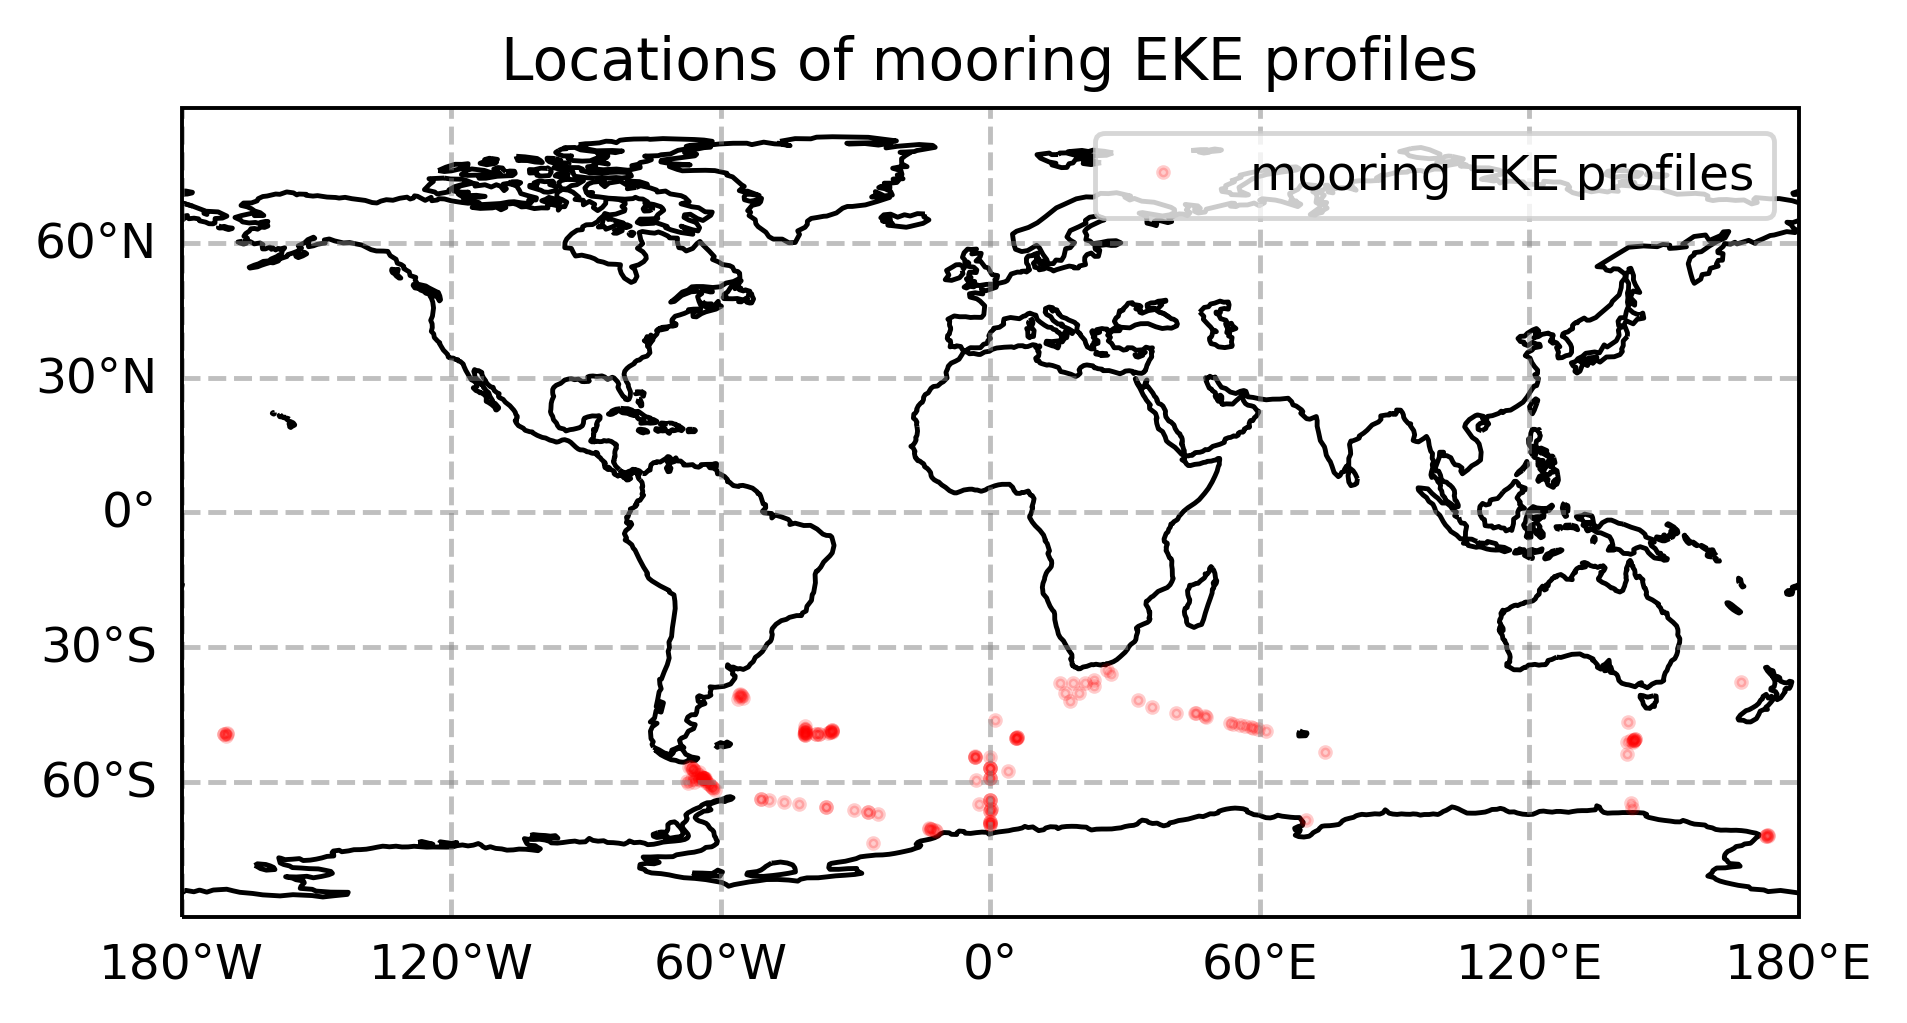

In [ ]:
fig = plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180, 180, -90, 90])

# ax.plot(argoLON, argoLAT, 'bo', markersize=0.5, transform=ccrs.PlateCarree(), alpha=0.1, label='Argo EKE profiles')
ax.plot(mooringLON, mooringLAT, 'ro', markersize=2, transform=ccrs.PlateCarree(), alpha=0.2, label='mooring EKE profiles')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# ax.set_extent([-48, -1, -41, -58])
plt.legend()
plt.title('Locations of mooring EKE profiles')
plt.show()

# # make a plot showing the counts of profiles at each location
# fig = plt.figure(figsize=(5, 3))
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.coastlines()
# ax.set_extent([-48, -1, -41, -58])

# # plot the counts of mooring profiles at each location, and color the locations on the map by the number of mooring profiles
# counts = np.zeros_like(mooringLAT)
# for i in range(len(mooringLAT)):
#     counts[i] = np.sum((mooringLAT[i] == mooringLAT) & (mooringLON[i] == mooringLON))
# points = ax.scatter(mooringLON, mooringLAT, c=counts, s=5, cmap='viridis', transform=ccrs.PlateCarree())
# plt.colorbar( points, ax=ax,
#     label='Number of mooring profiles at this location',
#     orientation='horizontal')

# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                   linewidth=1, color='gray', alpha=0.5, linestyle='--')
# gl.xlabels_top = False
# gl.ylabels_right = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER

# plt.tight_layout()
# plt.show()
    


In [ ]:
# Array dims
print(argoLAT.shape, argoLON.shape, argoEKE.shape)
print(mooringLAT.shape, mooringLON.shape, mooringEKE.shape, mooringDepths.shape)

# Translate the mooring longitudes to be in the range [-180,180] instead of [0,360]
mooringLON = np.where(mooringLON>180, mooringLON-360, mooringLON)

# Print min and max values of the data
print('min and max of argoLAT, argoLON, argoEKE:')
print(np.min(argoLAT).item(), np.max(argoLAT).item())
print(np.min(argoLON).item(), np.max(argoLON).item())
print(np.nanmin(argoEKE), np.nanmax(argoEKE))

print('min and max of mooringLAT, mooringLON, mooringEKE:')
print(np.min(mooringLAT), np.max(mooringLAT))
print(np.min(mooringLON), np.max(mooringLON))
print(np.nanmin(mooringEKE), np.nanmax(mooringEKE))


(720,) (1440,) (720, 1440, 30)
(169, 1) (169, 1) (169, 47) (169, 47)
min and max of argoLAT, argoLON, argoEKE:
-90.0 89.75
-180.0 179.75
-170369.77711218974 1733.2432922249122
min and max of mooringLAT, mooringLON, mooringEKE:
-73.627 -35.056833498636884
-170.512 173.211
5.9801308324904506e-05 0.2458569976778396


In [ ]:
### Haversine distance
from numba import njit, prange
from njit_options import opts
import numpy as np
import math


@njit(**opts())
def haversine_distance( lat0, lon0, lat, lon ) -> np.ndarray:
    """
    Calculate the  distance between two points on the Earth's surface with haversine formula.
    formula: https://en.wikipedia.org/wiki/Haversine_formula
    using arcsin, which could suffer from precision loss when distance is small.
    # R_earth * 2 = 6.371e6 * 2 = 12742000.0
    """
    phi1 = math.radians(lat0)
    lambda1 = math.radians(lon0)
    coslat1 = math.cos(phi1)
    n = lat.size
    distances = np.empty((n,))
    for i in prange(n):
        phi2 = math.radians(lat[i])
        a = math.sin((phi2 - phi1)/2.0)**2
        b = coslat1 * math.cos(phi2) * math.sin((lambda1 - math.radians(lon[i]))/2.0)**2
        distances[i] = 12742000.0 * math.asin( math.sqrt(a+b) )
    return distances

### Match and plot the mooring EKE profiles to the nearest time-mean Argo EKE profile

In [34]:
# Loop through the mooring profiles and find the closest Argo profile according to their latitude and longitude.
# Then note the index of the Argo profile paired with the index of the mooring profile.

closestArgoIndex = np.zeros(len(mooringLAT))
for mooring_i in range(len(mooringLAT)):
    currMooringLAT = mooringLAT.squeeze()[mooring_i]
    currMooringLON = mooringLON.squeeze()[mooring_i]
    
    dist = haversine_distance(currMooringLAT, currMooringLON, argoMeshLAT.flatten(), argoMeshLON.flatten()) #(argoLAT.values - currMooringLAT)**2 + (argoLON.values - currMooringLON)**2

    # Checking results
    if mooring_i % 50 == 0:
        print(currMooringLAT, currMooringLON)
        print('mooring_i:', mooring_i, 'np.argmin(dist)', np.argmin(dist))
        print(argoMeshLAT.flatten()[np.argmin(dist)], argoMeshLON.flatten()[np.argmin(dist)])
        print(int(np.argmin(dist)))
        print()
        
    closestArgoIndex[mooring_i] = int(np.argmin(dist))


-37.67 167.27
mooring_i: 0 np.argmin(dist) 302349
-37.75 167.25
302349

-57.065 -66.09500000000003
mooring_i: 50 np.argmin(dist) 190536
-57.0 -66.0
190536

-63.963 0.038
mooring_i: 100 np.argmin(dist) 150480
-64.0 0.0
150480

-44.735 45.755
mooring_i: 150 np.argmin(dist) 261543
-44.75 45.75
261543



In [19]:
# # print the mooring depths array for the mooring region data
# for depthArr in mooringDepths[mooring_region]:
#     print(depthArr) 
#     # TODO cont here, sort?

(169,) [302349. 233835. 235275. 235275. 238155. 239595. 242475. 245355. 233845.
 235288. 235296. 238177. 238179. 238179. 241059. 300302. 287346. 277271.
 288799. 300314. 300325. 297453. 304652. 311868. 317624. 105093. 105093.
 105091. 105091. 105092. 135972. 193412. 191974. 189095. 187657. 181901.
 177584. 176146. 168951. 166073. 163195. 174690. 171811. 176135. 173257.
 180457. 177579. 174701. 180462. 171828. 190536. 186220. 177584. 174707.
 170390. 167512. 190535. 177584. 179026. 167512. 179024. 179025. 179025.
 177585. 177582. 179025. 234758. 231879. 234760. 233320. 233318. 186496.
 206627. 206626. 206627. 229703. 229703. 231144. 231144. 229703. 144710.
 176387. 206627. 229704. 179280. 179280. 190800. 150480. 138961. 136080.
 121680. 118800. 118800. 190800. 150480. 136080. 121680. 179280. 190800.
 190800. 150480. 138961. 121680. 118800. 252724. 205200. 227374. 227374.
 228814. 225933. 228811. 228814. 227374. 225933. 240006. 241439. 242875.
 244312. 245747. 245742. 248616. 250053. 257

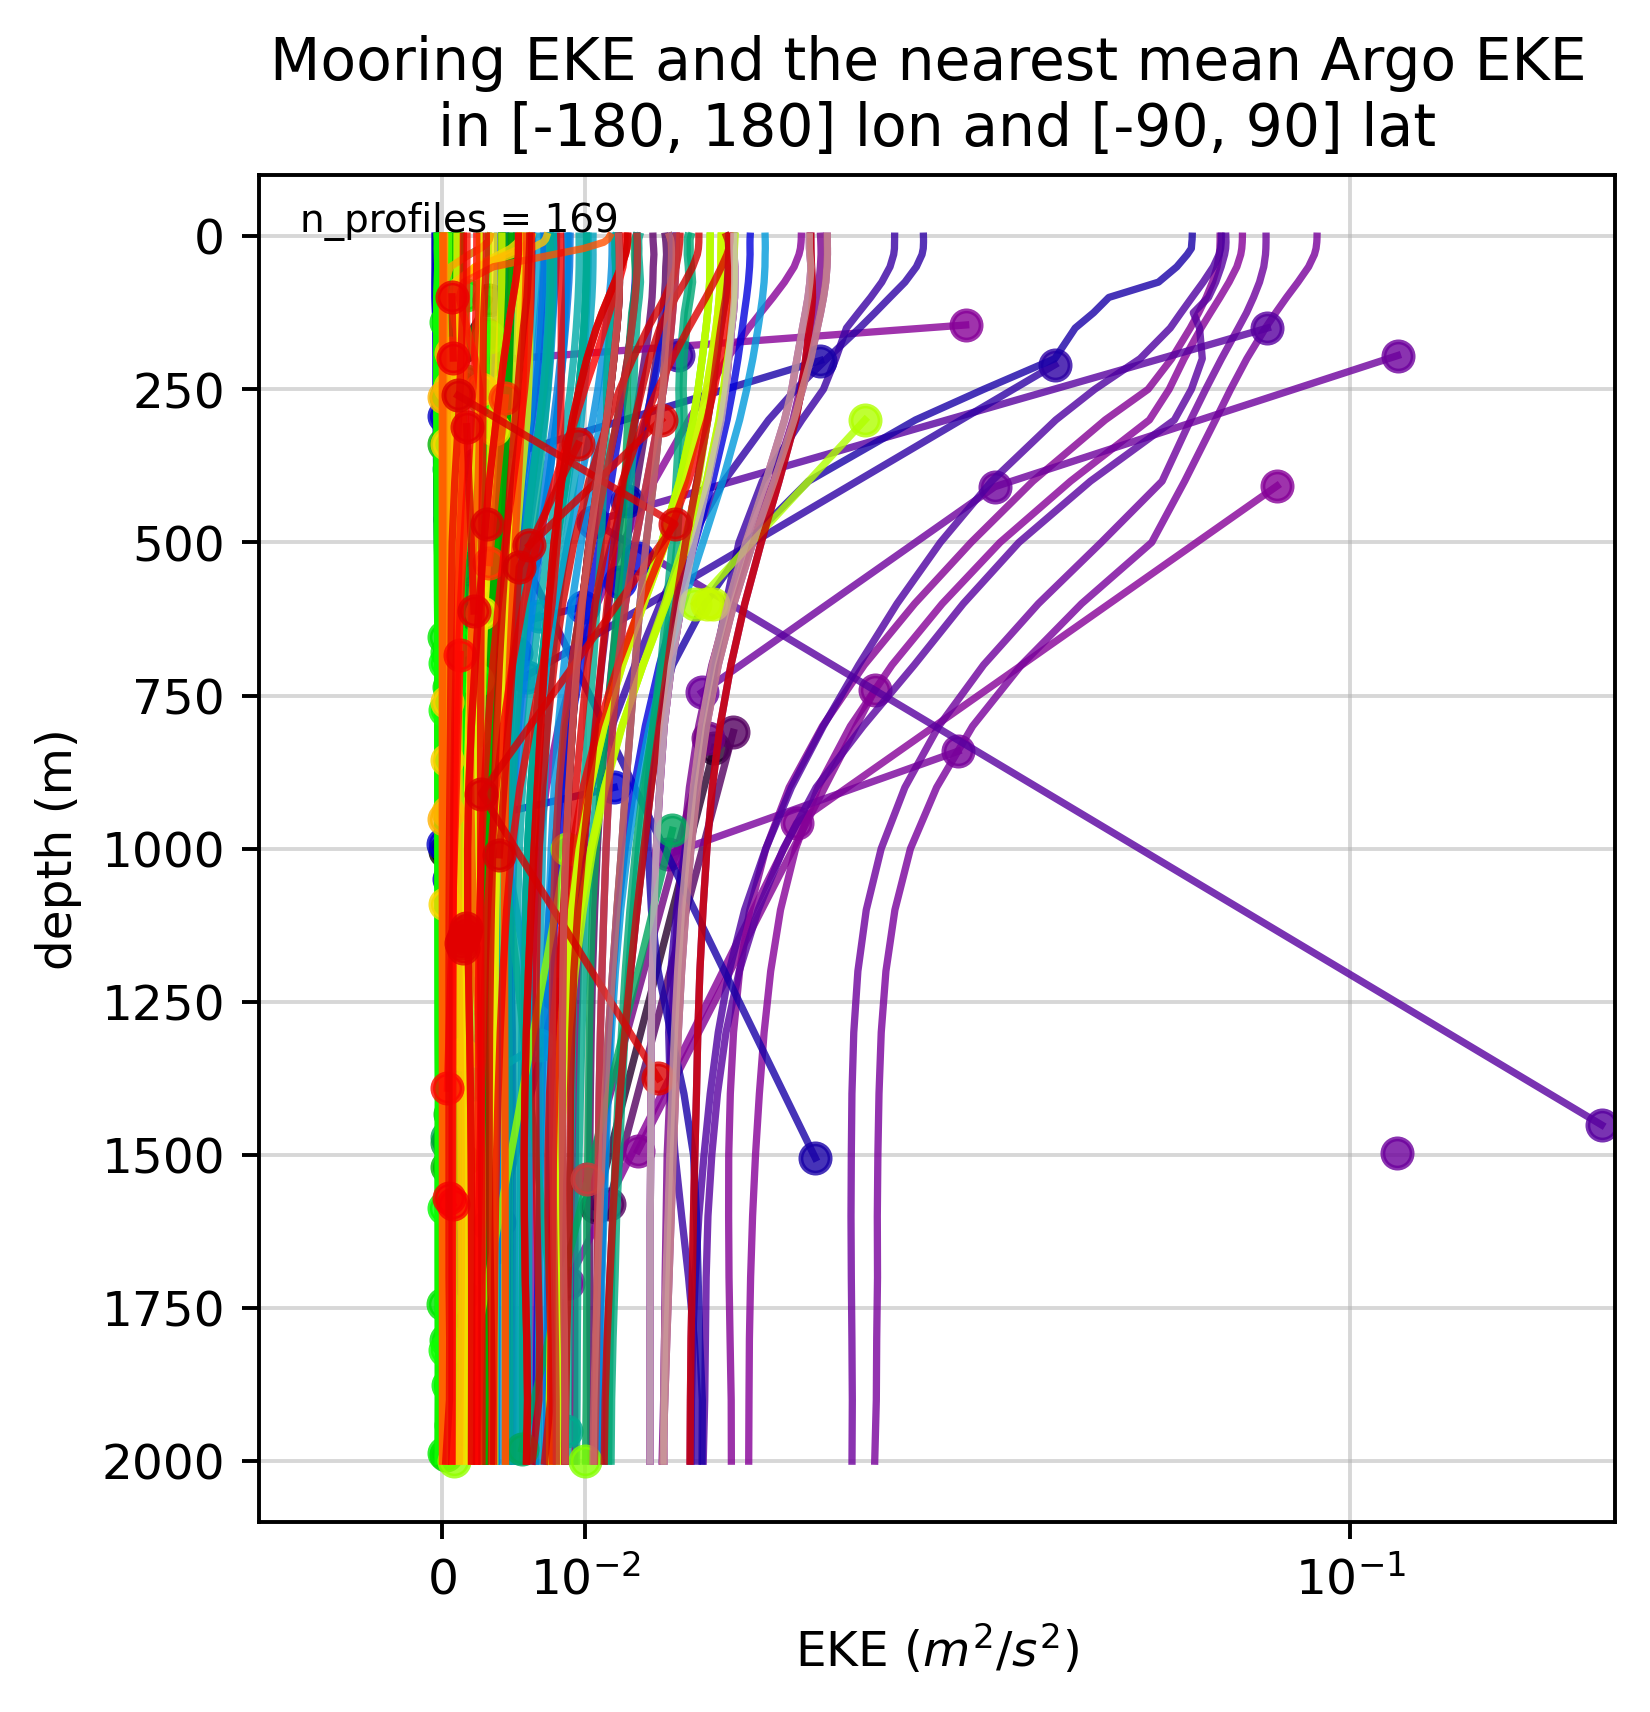

In [35]:
# Select only mooring data and its corresponding Argo data in the region
# and plot the EKE profiles of the mooring data and the corresponding Argo data

lat_bounds = [-90,90] # [-50, -45]
lon_bounds = [-180,180] # [-42, -35]

# Select the mooring data in the region defined by the bounds
mooring_region = np.where((mooringLAT >= lat_bounds[0]) & (mooringLAT <= lat_bounds[1]) & \
                            (mooringLON >= lon_bounds[0]) & (mooringLON <= lon_bounds[1]))[0]

# print(mooring_region)

# # select the data
# print(mooringLAT.shape, mooringLON.shape, mooringEKE.shape, mooringDepths.shape)
mooringLAT_region = mooringLAT.squeeze()[mooring_region]
mooringLON_region = mooringLON.squeeze()[mooring_region]
mooringEKE_region = mooringEKE[mooring_region,:]
mooringDepths_region = sortedMooringDepths[mooring_region,:]

# print(mooringLAT_region.shape, mooringLON_region.shape, mooringEKE_region.shape, mooringDepths_region.shape)

# Select the corresponding Argo data
closestArgoIndex_region = closestArgoIndex[mooring_region]
print(closestArgoIndex_region.shape, closestArgoIndex_region)

# Plot the EKE profiles
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in range(len(mooringLAT_region)):
    # get the color of the line to match the mooring profile with the corresponding Argo profile
    c= plt.cm.nipy_spectral(i/len(mooringLAT_region))

    # Plot the mooring profile
    ax.plot(mooringEKE_region[i,:], mooringDepths_region[i,:], 'o-', c=c, alpha=0.8) 

    # Convert the index of the closest Argo profile from flattened to the 2D index
    argo_index_2d = np.unravel_index(int(closestArgoIndex_region[i]), argoMeshLAT.shape)
    # print(argo_index_2d)
    ax.plot(argoEKE[argo_index_2d[0], argo_index_2d[1], :], plevels, c=c, alpha=0.8) 

# ax.set_yticks([0,2000,4000,6000])
ax.set_xlabel(r'EKE ($m^2/s^2$)')
ax.set_ylabel('depth (m)')
ax.invert_yaxis()
ax.set_title('Mooring EKE and the nearest mean Argo EKE \nin [{}, {}] lon and [{}, {}] lat'.format(lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]))
ax.grid(alpha=0.5)

# xscale log
ax.set_xscale('symlog', linthresh=0.05)

# import matplotlib.lines as mlines
# blue_line = mlines.Line2D([], [], color='blue', label='Mooring EKE')
# black_line = mlines.Line2D([], [], color='black', label='Nearest mean Argo EKE')
# plt.legend(handles=[blue_line, black_line])

plt.text(0.03, 0.98, 'n_profiles = ' + str(len(mooring_region   )), transform=ax.transAxes, fontsize=8,
        verticalalignment='top')

plt.savefig('mooringArgoEKE_region.pdf', dpi=300, bbox_inches='tight')
plt.show()



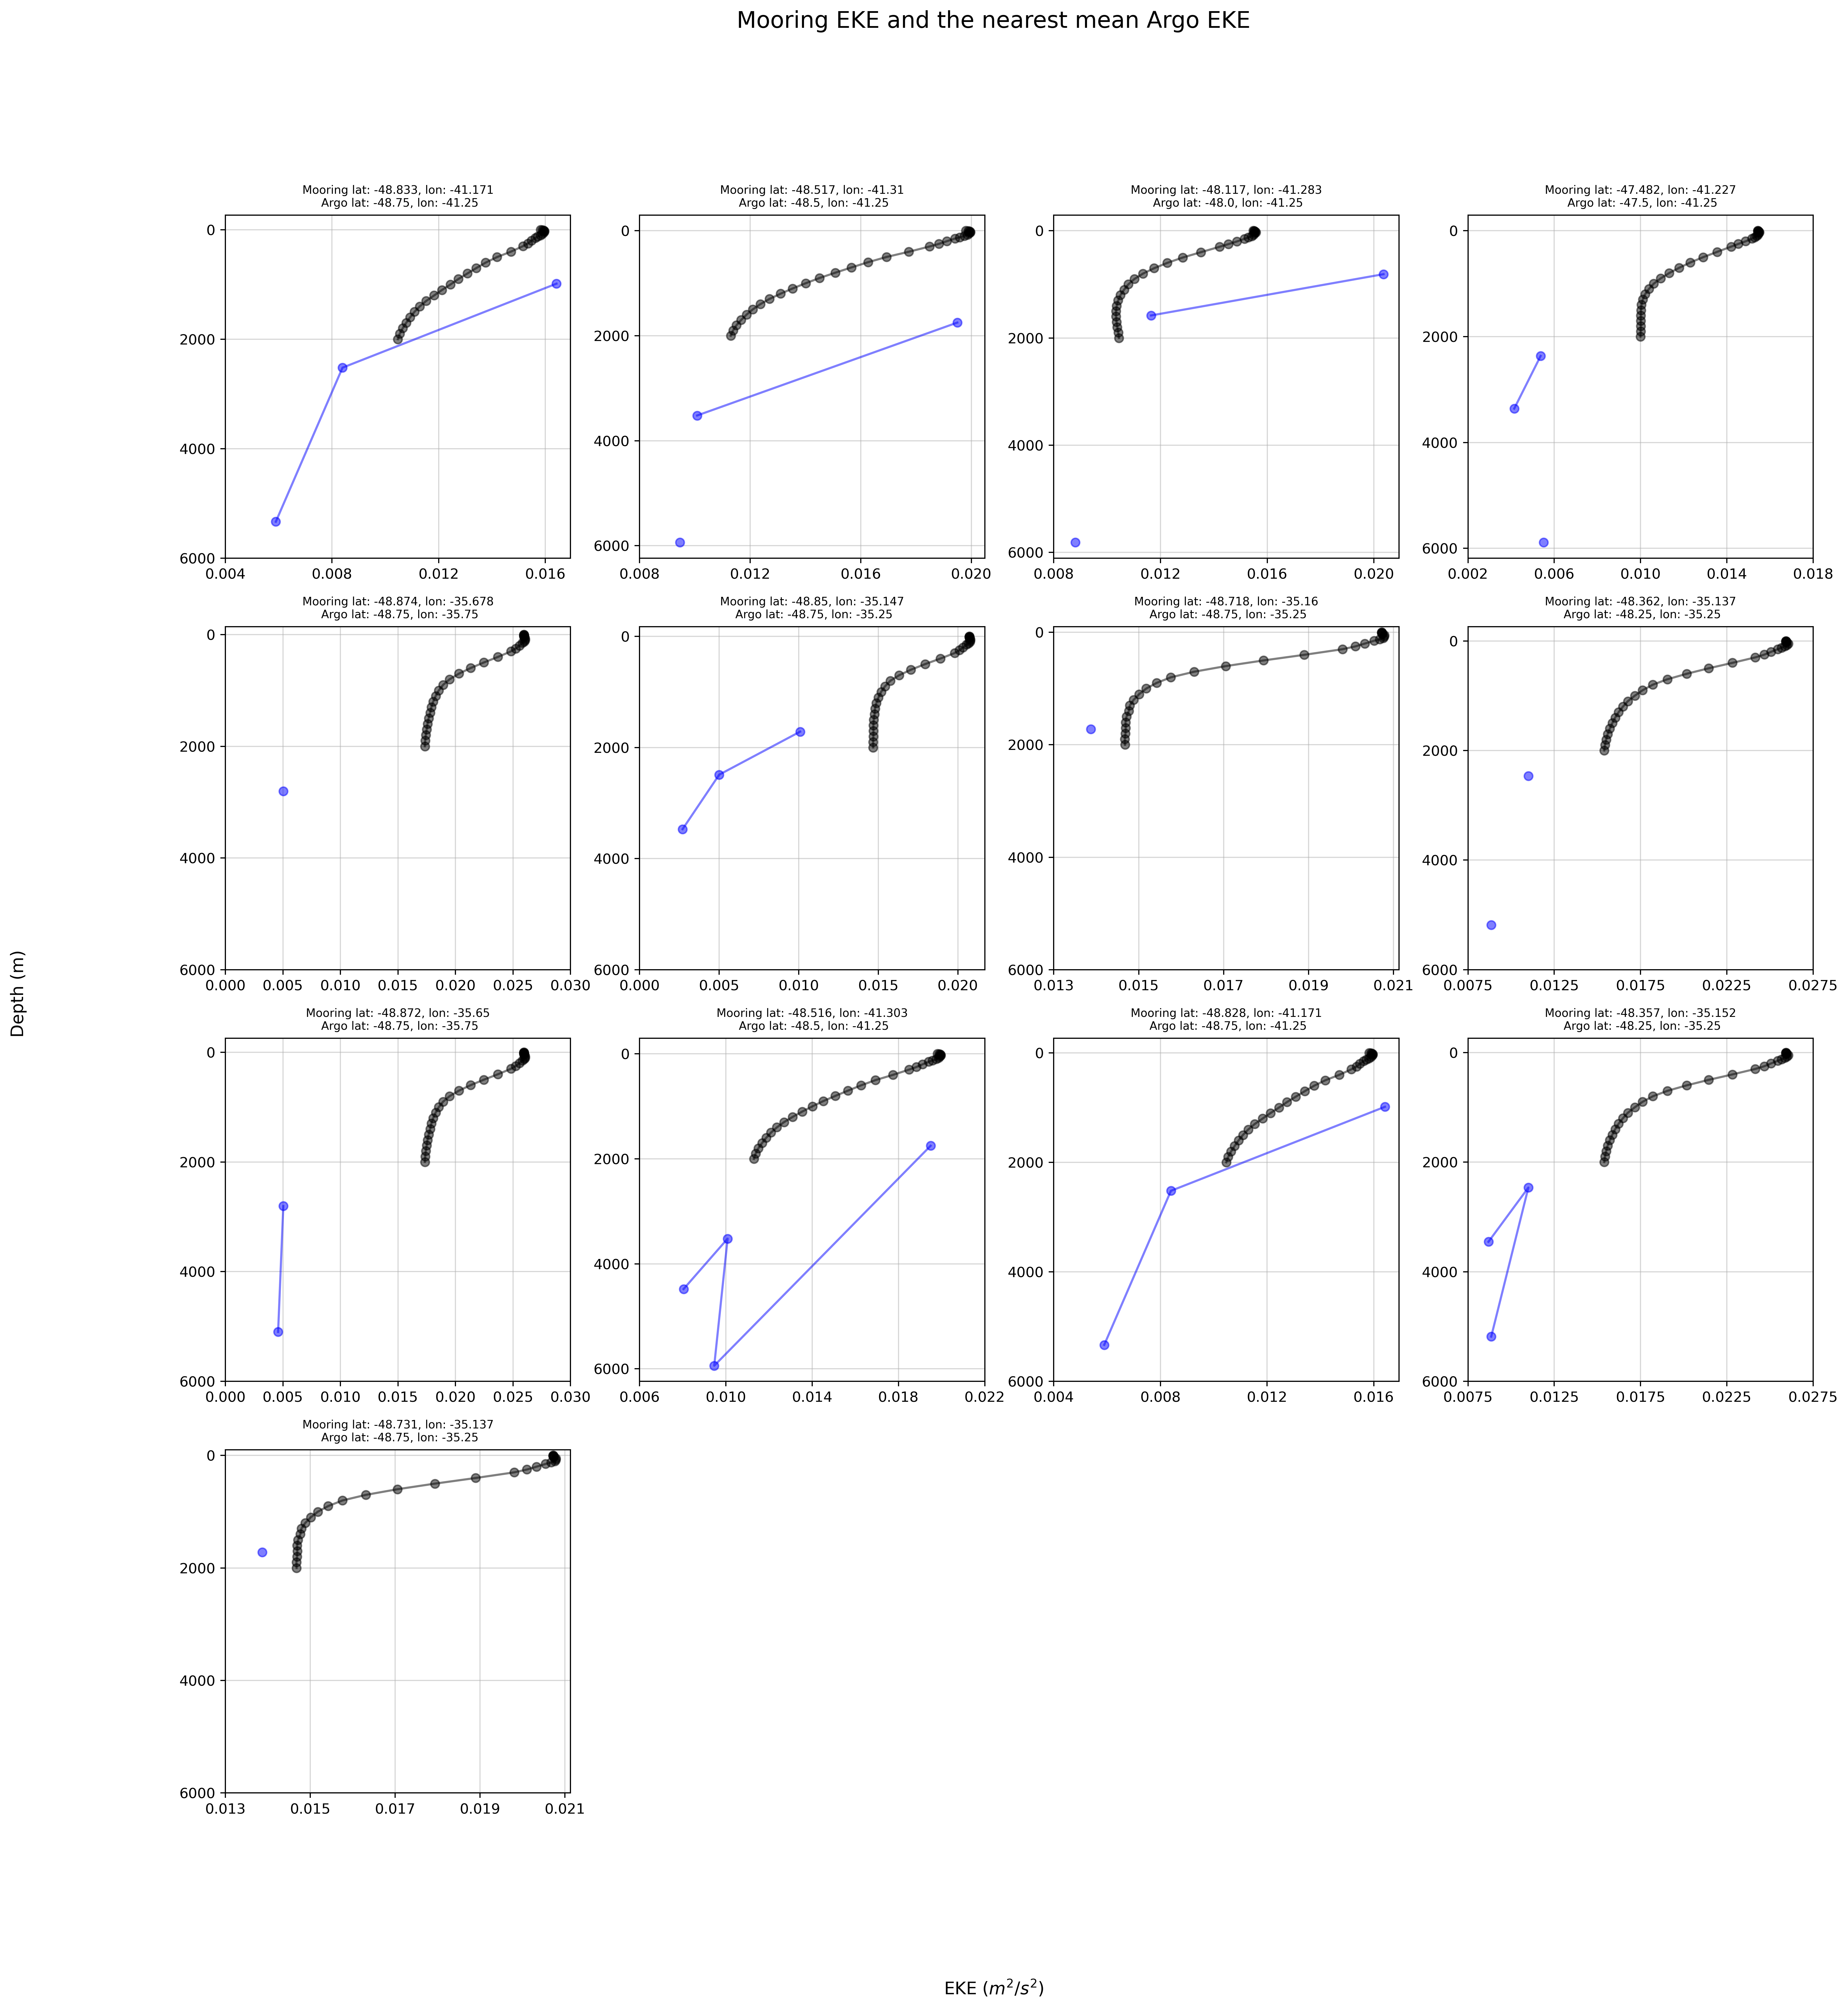

In [10]:
# plot the EKE profiles from the mooring and Argo data on the same plot for the region
fig, ax = plt.subplots(4, 4, figsize=(20,20))
ax = ax.ravel()
for i in range(len(mooringLAT_region)):
    # Plot the mooring profile
    ax[i].plot(mooringEKE_region[i,:], mooringDepths_region[i,:], 'bo-', alpha=0.5)

    # Convert the index of the closest Argo profile from flattened to the 2D index
    argo_index_2d = np.unravel_index(int(closestArgoIndex_region[i]), argoMeshLAT.shape)
    # print(argo_index_2d)
    ax[i].plot(argoEKE[argo_index_2d[0], argo_index_2d[1], :], plevels, 'ko-', alpha=0.5)

    ax[i].set_title('Mooring lat: ' + str(round(mooringLAT_region[i],3)) + \
                ', lon: ' + str(round(mooringLON_region[i],3)) +'\n Argo lat: ' + \
                str(round(argoMeshLAT[argo_index_2d],3)) \
                + ', lon: ' + str(round(argoMeshLON[argo_index_2d],3)), fontsize=8)
    ax[i].invert_yaxis();ax[i].grid(alpha=0.5)

    # make x-axis only have four ticks based on the current ticks
    xticks = ax[i].get_xticks()
    xticks = xticks[::len(xticks)//4]
    ax[i].set_xticks(xticks)

    ax[i].set_yticks([0,2000,4000,6000])




# get rid of the last three empty subplots
for i in range(13, 16):
    fig.delaxes(ax[i])
    

fig.supxlabel(r'EKE ($m^2/s^2$)', fontsize=12)
fig.suptitle('Mooring EKE and the nearest mean Argo EKE', fontsize=16)
fig.supylabel('Depth (m)', fontsize=12)
# fig.subplots_adjust(top=0.9)
# plt.legend()
plt.savefig('mooringArgoEKE_region_subplots.pdf', dpi=300, bbox_inches='tight')
plt.show()


1975-11-06 23:11:00.000004256 2005-02-03 05:29:59.999996672


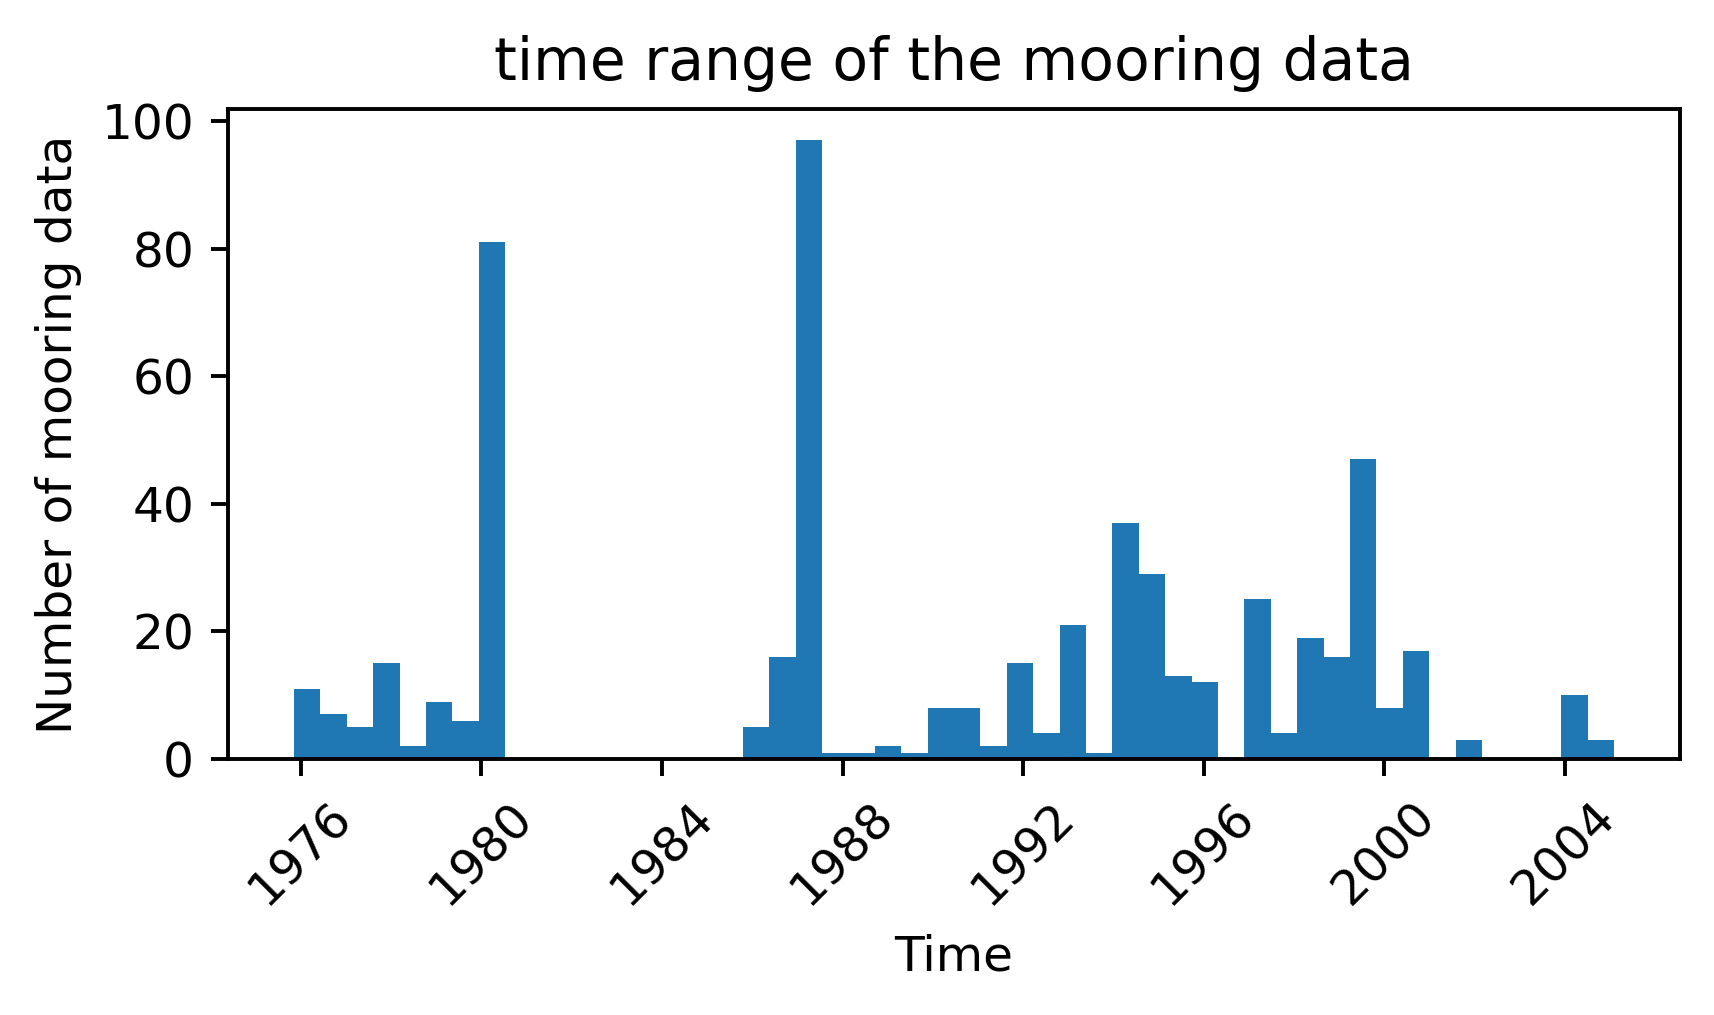

In [14]:
### Time range of the mooring data histogram
matlab_datenum = mooring_data['EndTime'].squeeze()
# print(matlab_datenum.shape)
# convert to datetime
datetimes = pd.to_datetime(matlab_datenum-719529, unit='D')
print(datetimes.min(), datetimes.max()) 

fig = plt.figure(figsize=(5, 3))
plt.hist(datetimes, bins=50)
plt.xlabel('Time')
plt.ylabel('Number of mooring data')
plt.title('time range of the mooring data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


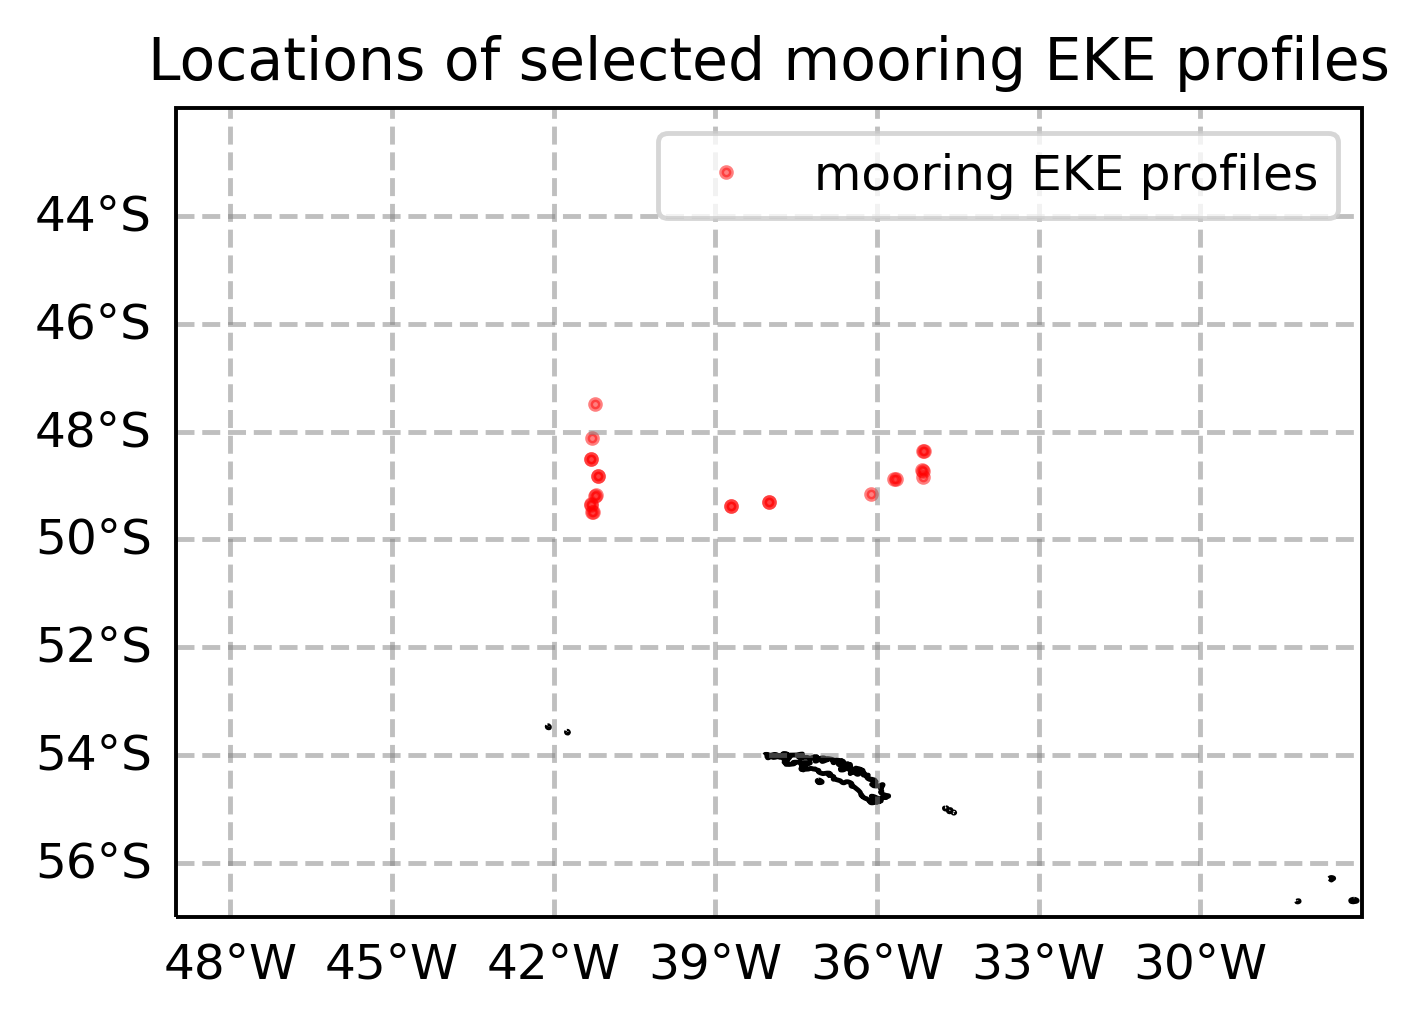

In [22]:
# plot the locations of the selected mooring data

fig = plt.figure(figsize=(6, 3))
# use 'Miller Cylindrical' projection
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# plot the locations of the selected mooring data
ax.plot(mooringLON_region, mooringLAT_region, 'ro', markersize=2, transform=ccrs.PlateCarree(), alpha=0.5, label='mooring EKE profiles')


# axis formatting
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

# make the xlim [-49, -27]and the ylim [-42, -57]
ax.set_extent([-49,-27,-42,-57])

gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.legend()
plt.title('Locations of selected mooring EKE profiles')
plt.savefig('mooringEKE_locations.pdf', dpi=300, bbox_inches='tight')
plt.show()